In [1]:
import numpy as np
import pickle
np.random.seed(7)  # for reproducibility


In [2]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Convolution2D, MaxPooling2D
from keras.layers.normalization import BatchNormalization
from keras.regularizers import l2


Using TensorFlow backend.


In [3]:
import keras
from keras.utils import np_utils
from keras import backend as K
K.set_image_dim_ordering('tf')

In [4]:
import matplotlib.pyplot as plt
import os
import numpy

In [5]:
def unpickle(file):
    with open(file,'rb') as fo:
        dict=pickle.load(fo, encoding='bytes')
    data=dict['data']
    data = data.reshape((-1, 32, 32, 3))
    labels=dict['label']
    return data, labels

In [6]:
def saveTest(your_predict_labels):
    f=open('testlabel.pickle','rb')
    labels=pickle.load(f)
    f.close()
  #here you must replace the labels that you have predicted for the test set:
    for i in range(len(labels)):
        labels[i]=your_predict_labels[i]
  #save the pickle file that you should upload:
    f=open('testlabel.pickle','wb')
    pickle.dump(labels,f)
    f.close()

In [7]:
X_train_label, Y_train_label =unpickle("trainset.pickle")
print(X_train_label.shape)

(9000, 32, 32, 3)


In [8]:
X_validation_label, Y_validation_label=unpickle("validset.pickle")

In [9]:
f=open('testset.pickle','rb')
dict=pickle.load(f)
f.close()
X_test_label=dict['data']
X_test_label = X_test_label.reshape((-1, 32, 32, 3))
X_test = X_test_label.astype('float32')

print(X_test_label.shape)

(3000, 32, 32, 3)


In [10]:
f=open('testlabel.pickle','rb')
Y_test_label=pickle.load(f)
f.close()
Y_test=np_utils.to_categorical(Y_test_label, 10)


In [11]:
X_train = X_train_label.astype('float32')
X_validation = X_validation_label.astype('float32')


Y_train = np_utils.to_categorical(Y_train_label, 10)
Y_validation = np_utils.to_categorical(Y_validation_label, 10)
print(X_train.shape)

(9000, 32, 32, 3)


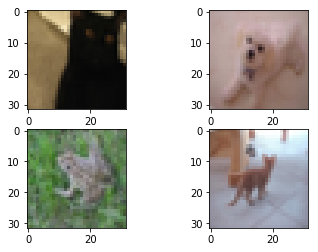

In [12]:
#image visualization
for i in range(4):
    img=X_train_label[i]
    img=img.reshape(-1,32,32).transpose([1,2,0])
    plt.subplot(2,2,i+1)
    plt.imshow(img)


In [13]:
# Parameter
num_classes = Y_train.shape[1]
batch_size = 64
epochs = 100
no_estimators = 5

In [14]:
# create CNN 6 conv layer & 2 Maxpooling layer
def create_cnn_model():
    model = Sequential()
    model.add(Convolution2D(32, 3, 3, input_shape=(32, 32, 3), activation='relu', border_mode='same'))
    model.add(BatchNormalization())    
    model.add(Dropout(0.2))
    model.add(Convolution2D(32, 3, 3, activation='relu', border_mode='same'))
    
    model.add(BatchNormalization())
    model.add(Convolution2D(64, 3, 3, activation='relu', border_mode='same'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(BatchNormalization())
    model.add(Dropout(0.2))
    model.add(Convolution2D(64, 3, 3, activation='relu', border_mode='same'))

    model.add(BatchNormalization())
    model.add(Convolution2D(128, 3, 3, activation='relu', border_mode='same'))
    model.add(BatchNormalization())
    model.add(Dropout(0.2))
    model.add(Convolution2D(128, 3, 3, activation='relu', border_mode='same'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(BatchNormalization())
    model.add(Flatten())
    
    model.add(Dropout(0.2))
    model.add(Dense(1024, activation='relu', W_regularizer=l2(0.01)))
    model.add(BatchNormalization())
    model.add(Dropout(0.2))
    model.add(Dense(512, activation='relu', W_regularizer=l2(0.01)))
    model.add(BatchNormalization())
    model.add(Dropout(0.2))
    model.add(Dense(10, activation='softmax'))
    # Compile model
    model.compile(loss='categorical_crossentropy', optimizer='SGD', metrics=['accuracy'])
    return model

C:\Users\PEM\Anaconda3\envs\bms-tf(gpu)\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), input_shape=(32, 32, 3..., activation="relu", padding="same")`
  after removing the cwd from sys.path.
C:\Users\PEM\Anaconda3\envs\bms-tf(gpu)\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu", padding="same")`
  import sys
C:\Users\PEM\Anaconda3\envs\bms-tf(gpu)\lib\site-packages\ipykernel_launcher.py:10: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), activation="relu", padding="same")`
  # Remove the CWD from sys.path while we load stuff.
C:\Users\PEM\Anaconda3\envs\bms-tf(gpu)\lib\site-packages\ipykernel_launcher.py:14: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), activation="relu", padding="same")`
  
C:\Users\PEM\Anaconda3\envs\bms-tf(gpu)\lib\site-packages\ipykernel_l

Train on 9000 samples, validate on 3000 samples
Epoch 1/100
 - 12s - loss: 26.6616 - acc: 0.3178 - val_loss: 25.1579 - val_acc: 0.5463
Epoch 2/100
 - 4s - loss: 24.5812 - acc: 0.5031 - val_loss: 23.7861 - val_acc: 0.5163
Epoch 3/100
 - 4s - loss: 22.9919 - acc: 0.5727 - val_loss: 22.4573 - val_acc: 0.5197
Epoch 4/100
 - 4s - loss: 21.6284 - acc: 0.5980 - val_loss: 21.0192 - val_acc: 0.5823
Epoch 5/100
 - 4s - loss: 20.4012 - acc: 0.6244 - val_loss: 20.0729 - val_acc: 0.5297
Epoch 6/100
 - 4s - loss: 19.2832 - acc: 0.6319 - val_loss: 18.7403 - val_acc: 0.6157
Epoch 7/100
 - 4s - loss: 18.2307 - acc: 0.6480 - val_loss: 17.7405 - val_acc: 0.6277
Epoch 8/100
 - 4s - loss: 17.2574 - acc: 0.6573 - val_loss: 16.7917 - val_acc: 0.6397
Epoch 9/100
 - 4s - loss: 16.3173 - acc: 0.6711 - val_loss: 15.9417 - val_acc: 0.6467
Epoch 10/100
 - 4s - loss: 15.4355 - acc: 0.6863 - val_loss: 15.1375 - val_acc: 0.6433
Epoch 11/100
 - 4s - loss: 14.6164 - acc: 0.6940 - val_loss: 14.3656 - val_acc: 0.6223
Epo

Epoch 97/100
 - 4s - loss: 0.6193 - acc: 0.9752 - val_loss: 2.1351 - val_acc: 0.6627
Epoch 98/100
 - 4s - loss: 0.6068 - acc: 0.9767 - val_loss: 2.0205 - val_acc: 0.6740
Epoch 99/100
 - 4s - loss: 0.6015 - acc: 0.9792 - val_loss: 2.1176 - val_acc: 0.6760
Epoch 100/100
 - 4s - loss: 0.6029 - acc: 0.9751 - val_loss: 1.9686 - val_acc: 0.6827
3000/3000 [==============================] - 1s 200us/step

Test Accuracy: 0.7500


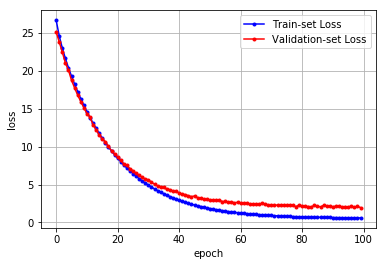

Train on 9000 samples, validate on 3000 samples
Epoch 1/100
 - 11s - loss: 26.6448 - acc: 0.3343 - val_loss: 26.0247 - val_acc: 0.4213
Epoch 2/100
 - 4s - loss: 24.5755 - acc: 0.4917 - val_loss: 24.1994 - val_acc: 0.4607
Epoch 3/100
 - 4s - loss: 22.9850 - acc: 0.5616 - val_loss: 22.3509 - val_acc: 0.5473
Epoch 4/100
 - 4s - loss: 21.6244 - acc: 0.5894 - val_loss: 20.9009 - val_acc: 0.6187
Epoch 5/100
 - 4s - loss: 20.4065 - acc: 0.6117 - val_loss: 19.8362 - val_acc: 0.6060
Epoch 6/100
 - 4s - loss: 19.2838 - acc: 0.6301 - val_loss: 18.7179 - val_acc: 0.6267
Epoch 7/100
 - 4s - loss: 18.2405 - acc: 0.6411 - val_loss: 17.7173 - val_acc: 0.6313
Epoch 8/100
 - 4s - loss: 17.2525 - acc: 0.6568 - val_loss: 16.7951 - val_acc: 0.6393
Epoch 9/100
 - 4s - loss: 16.3166 - acc: 0.6707 - val_loss: 15.8750 - val_acc: 0.6540
Epoch 10/100
 - 4s - loss: 15.4459 - acc: 0.6756 - val_loss: 15.0529 - val_acc: 0.6467
Epoch 11/100
 - 4s - loss: 14.6174 - acc: 0.6927 - val_loss: 14.3283 - val_acc: 0.6380
Epo

Epoch 97/100
 - 4s - loss: 0.6029 - acc: 0.9774 - val_loss: 2.0238 - val_acc: 0.6847
Epoch 98/100
 - 4s - loss: 0.6033 - acc: 0.9752 - val_loss: 2.1482 - val_acc: 0.6873
Epoch 99/100
 - 4s - loss: 0.5829 - acc: 0.9803 - val_loss: 2.0437 - val_acc: 0.6770
Epoch 100/100
 - 4s - loss: 0.5706 - acc: 0.9821 - val_loss: 2.1387 - val_acc: 0.6803
3000/3000 [==============================] - 1s 184us/step

Test Accuracy: 0.7333


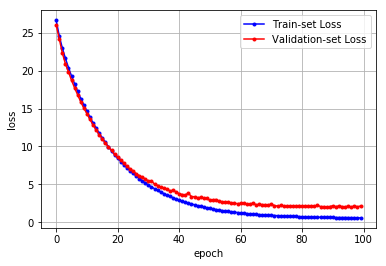

Train on 9000 samples, validate on 3000 samples
Epoch 1/100
 - 12s - loss: 26.6402 - acc: 0.3374 - val_loss: 25.2560 - val_acc: 0.5243
Epoch 2/100
 - 4s - loss: 24.5757 - acc: 0.4990 - val_loss: 23.5934 - val_acc: 0.5563
Epoch 3/100
 - 4s - loss: 22.9816 - acc: 0.5690 - val_loss: 22.2402 - val_acc: 0.5633
Epoch 4/100
 - 4s - loss: 21.6362 - acc: 0.5924 - val_loss: 21.0911 - val_acc: 0.5760
Epoch 5/100
 - 4s - loss: 20.4288 - acc: 0.6134 - val_loss: 19.8005 - val_acc: 0.6140
Epoch 6/100
 - 4s - loss: 19.2817 - acc: 0.6343 - val_loss: 18.7492 - val_acc: 0.6320
Epoch 7/100
 - 4s - loss: 18.2357 - acc: 0.6454 - val_loss: 17.7292 - val_acc: 0.6360
Epoch 8/100
 - 4s - loss: 17.2545 - acc: 0.6577 - val_loss: 16.8445 - val_acc: 0.6263
Epoch 9/100
 - 4s - loss: 16.3202 - acc: 0.6710 - val_loss: 16.0463 - val_acc: 0.6093
Epoch 10/100
 - 4s - loss: 15.4598 - acc: 0.6728 - val_loss: 15.0738 - val_acc: 0.6493
Epoch 11/100
 - 4s - loss: 14.6321 - acc: 0.6881 - val_loss: 14.3236 - val_acc: 0.6473
Epo

Epoch 97/100
 - 4s - loss: 0.6151 - acc: 0.9769 - val_loss: 1.9886 - val_acc: 0.6897
Epoch 98/100
 - 4s - loss: 0.6014 - acc: 0.9804 - val_loss: 2.0324 - val_acc: 0.6733
Epoch 99/100
 - 4s - loss: 0.5838 - acc: 0.9823 - val_loss: 1.9635 - val_acc: 0.6970
Epoch 100/100
 - 4s - loss: 0.5807 - acc: 0.9823 - val_loss: 1.9524 - val_acc: 0.6897
3000/3000 [==============================] - 1s 182us/step

Test Accuracy: 0.7537


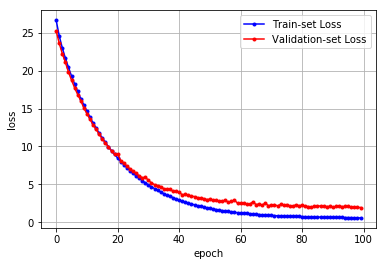

Train on 9000 samples, validate on 3000 samples
Epoch 1/100
 - 9s - loss: 26.6296 - acc: 0.3361 - val_loss: 25.8575 - val_acc: 0.3973
Epoch 2/100
 - 4s - loss: 24.5506 - acc: 0.5096 - val_loss: 23.5613 - val_acc: 0.5697
Epoch 3/100
 - 4s - loss: 22.9852 - acc: 0.5627 - val_loss: 22.3508 - val_acc: 0.5350
Epoch 4/100
 - 4s - loss: 21.6620 - acc: 0.5799 - val_loss: 21.0172 - val_acc: 0.5580
Epoch 5/100
 - 4s - loss: 20.4220 - acc: 0.6040 - val_loss: 19.7854 - val_acc: 0.6073
Epoch 6/100
 - 4s - loss: 19.2871 - acc: 0.6308 - val_loss: 18.7455 - val_acc: 0.6140
Epoch 7/100
 - 4s - loss: 18.2526 - acc: 0.6356 - val_loss: 17.7220 - val_acc: 0.6410
Epoch 8/100
 - 4s - loss: 17.2507 - acc: 0.6516 - val_loss: 16.7814 - val_acc: 0.6400
Epoch 9/100
 - 4s - loss: 16.3261 - acc: 0.6688 - val_loss: 15.9404 - val_acc: 0.6257
Epoch 10/100
 - 4s - loss: 15.4557 - acc: 0.6700 - val_loss: 15.1562 - val_acc: 0.6140
Epoch 11/100
 - 4s - loss: 14.6180 - acc: 0.6906 - val_loss: 14.3101 - val_acc: 0.6520
Epoc

Epoch 97/100
 - 4s - loss: 0.6048 - acc: 0.9778 - val_loss: 2.0176 - val_acc: 0.6877
Epoch 98/100
 - 4s - loss: 0.5991 - acc: 0.9788 - val_loss: 1.9881 - val_acc: 0.6973
Epoch 99/100
 - 4s - loss: 0.5822 - acc: 0.9827 - val_loss: 2.1379 - val_acc: 0.6813
Epoch 100/100
 - 4s - loss: 0.5906 - acc: 0.9776 - val_loss: 2.1084 - val_acc: 0.6907
3000/3000 [==============================] - 1s 182us/step

Test Accuracy: 0.7657


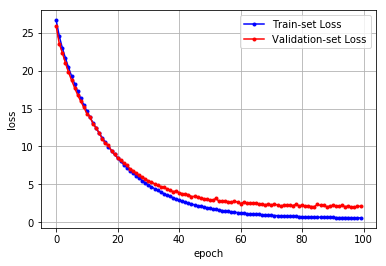

Train on 9000 samples, validate on 3000 samples
Epoch 1/100
 - 11s - loss: 26.6380 - acc: 0.3429 - val_loss: 25.6146 - val_acc: 0.4430
Epoch 2/100
 - 4s - loss: 24.5831 - acc: 0.5010 - val_loss: 23.7082 - val_acc: 0.5460
Epoch 3/100
 - 4s - loss: 23.0039 - acc: 0.5608 - val_loss: 22.5785 - val_acc: 0.4870
Epoch 4/100
 - 4s - loss: 21.6242 - acc: 0.5997 - val_loss: 20.9162 - val_acc: 0.6067
Epoch 5/100
 - 4s - loss: 20.4155 - acc: 0.6110 - val_loss: 20.0262 - val_acc: 0.5487
Epoch 6/100
 - 4s - loss: 19.2750 - acc: 0.6302 - val_loss: 18.8198 - val_acc: 0.6007
Epoch 7/100
 - 4s - loss: 18.2354 - acc: 0.6456 - val_loss: 17.9733 - val_acc: 0.5487
Epoch 8/100
 - 4s - loss: 17.2450 - acc: 0.6594 - val_loss: 16.7770 - val_acc: 0.6397
Epoch 9/100
 - 4s - loss: 16.3171 - acc: 0.6704 - val_loss: 15.9280 - val_acc: 0.6347
Epoch 10/100
 - 4s - loss: 15.4439 - acc: 0.6801 - val_loss: 15.6425 - val_acc: 0.4900
Epoch 11/100
 - 4s - loss: 14.6142 - acc: 0.6912 - val_loss: 14.2779 - val_acc: 0.6537
Epo

Epoch 97/100
 - 4s - loss: 0.6097 - acc: 0.9766 - val_loss: 2.1725 - val_acc: 0.6797
Epoch 98/100
 - 4s - loss: 0.5903 - acc: 0.9799 - val_loss: 2.1219 - val_acc: 0.6810
Epoch 99/100
 - 4s - loss: 0.5941 - acc: 0.9767 - val_loss: 2.0502 - val_acc: 0.6800
Epoch 100/100
 - 4s - loss: 0.5947 - acc: 0.9760 - val_loss: 2.1621 - val_acc: 0.6897
3000/3000 [==============================] - 1s 181us/step

Test Accuracy: 0.7583


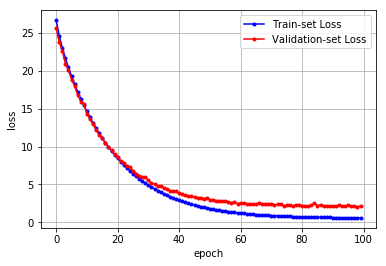

In [16]:
## ENSEMBLE MODELS
# Train many CNN models
for i in np.arange(no_estimators):
    # check point to save best model
    checkpoint = keras.callbacks.ModelCheckpoint('models_4/model_'+str(i)+'.h5', monitor='val_acc', \
            verbose=0, save_best_only=True, save_weights_only=True, mode='auto')
    # clear GPU memory
    model = None
    K.clear_session()
    
    # train model
    model = create_cnn_model()
    history=model.fit(X_train, Y_train, validation_data=(X_validation, Y_validation), nb_epoch=100, \
                batch_size=64, verbose=2, callbacks=[checkpoint])
    print("\nTest Accuracy: {:.4f}".format(model.evaluate(X_test, Y_test)[1]))
    y_vloss=history.history['val_loss']
    y_loss=history.history['loss']
    
    x_len=numpy.arange(len(y_loss))
    plt.plot(x_len, y_loss, marker='.', c='blue', label="Train-set Loss")
    plt.plot(x_len, y_vloss, marker='.', c='red', label="Validation-set Loss")
    
    plt.legend(loc='upper right')
    plt.grid()
    plt.xlabel('epoch')
    plt.ylabel('loss')
    plt.show()

In [18]:
# Check individual scores - val_acc and get list of the best models
score_list = []
score_list2 = []
score_list3=[]
model = create_cnn_model()
for i in np.arange(no_estimators):    
    model.load_weights('models_4/model_'+str(i)+'.h5')
    scores3= model.evaluate(X_test, Y_test, verbose=0)
    scores2= model.evaluate(X_train, Y_train, verbose=0)
    scores = model.evaluate(X_validation, Y_validation, verbose=0)
    score_list.append(scores[1])   #validation Acc
    score_list2.append(scores2[1])    #Train Acc
    score_list3.append(scores3[1])  #Test Acc
score_list = np.array(score_list)
score_list2= np.array(score_list2)
score_list3= np.array(score_list3)
score_list_filter = score_list >= 0.70 # threshold to select best model
print("Train Acc: "+str(score_list2))
print("Validation Acc: "+ str(score_list))
print("Test Acc: "+ str(score_list3))

print(score_list_filter)

C:\Users\PEM\Anaconda3\envs\bms-tf(gpu)\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), input_shape=(32, 32, 3..., activation="relu", padding="same")`
  after removing the cwd from sys.path.
C:\Users\PEM\Anaconda3\envs\bms-tf(gpu)\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu", padding="same")`
  import sys
C:\Users\PEM\Anaconda3\envs\bms-tf(gpu)\lib\site-packages\ipykernel_launcher.py:10: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), activation="relu", padding="same")`
  # Remove the CWD from sys.path while we load stuff.
C:\Users\PEM\Anaconda3\envs\bms-tf(gpu)\lib\site-packages\ipykernel_launcher.py:14: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), activation="relu", padding="same")`
  
C:\Users\PEM\Anaconda3\envs\bms-tf(gpu)\lib\site-packages\ipykernel_l

Train Acc: [0.99855556 0.99811111 0.99911111 0.99911111 0.998     ]
Validation Acc: [0.691      0.704      0.697      0.69733333 0.69433333]
Test Acc: [0.75366667 0.761      0.76633333 0.75433333 0.74566667]
[False  True False False False]


In [19]:
# Ensemble predictions ~ val_err 16%
predictions = np.zeros((Y_validation.shape[0],Y_validation.shape[1]))
predictions_test=np.zeros((Y_test.shape[0],Y_test.shape[1]))
model = create_cnn_model()
for i in np.arange(no_estimators): 
    if score_list_filter[i] == False:
        continue
    #validation
    model.load_weights('models_4/model_'+str(i)+'.h5')
    prediction = model.predict_classes(X_validation, batch_size=200, verbose=0)
    prediction_onehot = np_utils.to_categorical(prediction, 10)
    predictions = predictions + prediction_onehot*score_list[i]
    #Test
    prediction_test = model.predict_classes(X_test, batch_size=200, verbose=0)
    prediction_onehot_test = np_utils.to_categorical(prediction_test, 10)
    predictions_test = predictions_test + prediction_onehot_test*score_list3[i]

predictions_label = np.argmax(predictions, axis=1)
evaluate = np.equal(predictions_label, Y_validation_label)

predictions_label_test = np.argmax(predictions_test, axis=1)
evaluate_test = np.equal(predictions_label_test, Y_test_label)

print("Ensemble Validation_Error: %.2f%%" % (100-np.mean(evaluate)*100))
print("Ensemble Validation_Accuracy: %.2f%%" % (np.mean(evaluate)*100))

print("Ensemble Test_Error: %.2f%%" % (100-np.mean(evaluate_test)*100))
print("Ensemble Test_Accuracy: %.2f%%" % (np.mean(evaluate_test)*100))

C:\Users\PEM\Anaconda3\envs\bms-tf(gpu)\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), input_shape=(32, 32, 3..., activation="relu", padding="same")`
  after removing the cwd from sys.path.
C:\Users\PEM\Anaconda3\envs\bms-tf(gpu)\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu", padding="same")`
  import sys
C:\Users\PEM\Anaconda3\envs\bms-tf(gpu)\lib\site-packages\ipykernel_launcher.py:10: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), activation="relu", padding="same")`
  # Remove the CWD from sys.path while we load stuff.
C:\Users\PEM\Anaconda3\envs\bms-tf(gpu)\lib\site-packages\ipykernel_launcher.py:14: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), activation="relu", padding="same")`
  
C:\Users\PEM\Anaconda3\envs\bms-tf(gpu)\lib\site-packages\ipykernel_l

Ensemble Validation_Error: 29.60%
Ensemble Validation_Accuracy: 70.40%
Ensemble Test_Error: 23.90%
Ensemble Test_Accuracy: 76.10%


In [21]:
## PERFORM PREDICTION ON TEST SET

X_test = X_test_label.astype('float32')

predictions = np.zeros((Y_validation.shape[0],Y_validation.shape[1]))
model = create_cnn_model()
for i in np.arange(no_estimators): 
    if score_list_filter[i] == False: # skip bad model
        continue
    model.load_weights('models_4/model_'+str(i)+'.h5')
    prediction = model.predict_classes(X_test, batch_size=200, verbose=0)
    prediction_onehot = np_utils.to_categorical(prediction, 10)
    predictions = predictions + prediction_onehot*score_list[i]

predictions_label = np.argmax(predictions, axis=1)
output = predictions_label.tolist()

with open('testlabel.pickle','wb') as f:
    pickle.dump(output, f)

pred = model.evaluate(X_test, Y_test)
print("test loss: ",pred[0]+"test acc: ",pred[1])

C:\Users\PEM\Anaconda3\envs\bms-tf(gpu)\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), input_shape=(32, 32, 3..., activation="relu", padding="same")`
  after removing the cwd from sys.path.
C:\Users\PEM\Anaconda3\envs\bms-tf(gpu)\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu", padding="same")`
  import sys
C:\Users\PEM\Anaconda3\envs\bms-tf(gpu)\lib\site-packages\ipykernel_launcher.py:10: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), activation="relu", padding="same")`
  # Remove the CWD from sys.path while we load stuff.
C:\Users\PEM\Anaconda3\envs\bms-tf(gpu)\lib\site-packages\ipykernel_launcher.py:14: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), activation="relu", padding="same")`
  
C:\Users\PEM\Anaconda3\envs\bms-tf(gpu)\lib\site-packages\ipykernel_l

3000/3000 [==============================] - 1s 337us/step


TypeError: ufunc 'add' did not contain a loop with signature matching types dtype('<U32') dtype('<U32') dtype('<U32')